This is the number of arrests per neighborhood.

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
crime = pd.read_csv("Crime.csv")

list = {}
for index, row in crime.iterrows():
    item = row["INCIDENTNEIGHBORHOOD"]
    if(item in list):
        list[item] += 1
    else:
        list[item] = 1
print(list)

{'Bloomfield': 984, 'Outside City': 316, 'Westwood': 226, 'East Allegheny': 2217, 'Crafton Heights': 601, 'Greenfield': 537, 'Brookline': 1390, 'Regent Square': 37, 'East Liberty': 1889, nan: 2489, 'East Hills': 1194, 'Carrick': 2352, 'Allegheny Center': 1244, 'South Side Flats': 3497, 'Sheraden': 1285, 'East Carnegie': 48, 'Golden Triangle/Civic Arena': 83, 'Point Breeze North': 289, 'Perry South': 1057, 'Allentown': 947, 'North Shore': 814, 'Marshall-Shadeland': 1516, 'Central Oakland': 521, 'Middle Hill': 932, 'Strip District': 503, 'Lincoln-Lemington-Belmar': 1362, 'Central Northside': 23, 'Troy Hill-Herrs Island': 6, 'Highland Park': 558, 'Homewood North': 1969, 'Northview Heights': 713, 'Brighton Heights': 1114, 'Hazelwood': 1396, 'Perry North': 587, 'Bedford Dwellings': 665, 'Elliott': 663, 'Beechview': 1201, 'Fineview': 796, 'Glen Hazel': 169, 'Spring Hill-City View': 711, 'Bluff': 1502, 'Manchester': 471, 'Homewood West': 764, 'Outside County': 57, 'Point Breeze': 301, 'Homewo

In [28]:
num_crime = pd.Series(list)
print(num_crime.to_frame())
#num_crime = crime.groupby("INCIDENTNEIGHBORHOOD")
#num_crime.sort_values(ascending=False)

                    0
Bloomfield        984
Outside City      316
Westwood          226
East Allegheny   2217
Crafton Heights   601
...               ...
Ridgemont          37
Swisshelm Park     43
Hays              120
Chartiers City     46
Mt. Oliver Boro    18

[99 rows x 1 columns]


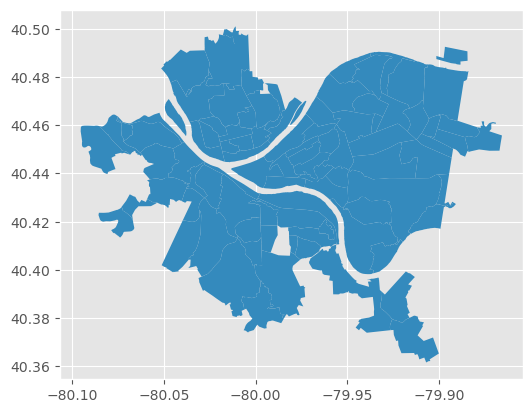

In [18]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot()
plt.style.use('ggplot')
plt.show()

In [37]:
merged = neighborhoods.merge(num_crime.rename("count"), left_on="hood", right_on=num_crime.index)
merged[["hood", "count", "geometry"]]

,hood,count,geometry
0,Central Oakland,521,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,455,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,325,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,839,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,503,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...
84,Ridgemont,37,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
85,West End,290,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
86,California-Kirkbride,315,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
87,Glen Hazel,169,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


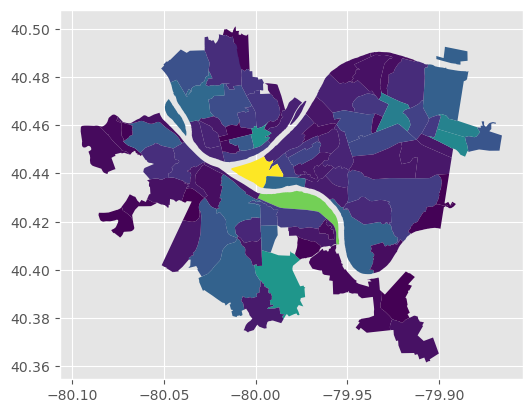

In [44]:
merged.plot(column="count")
plt.show()

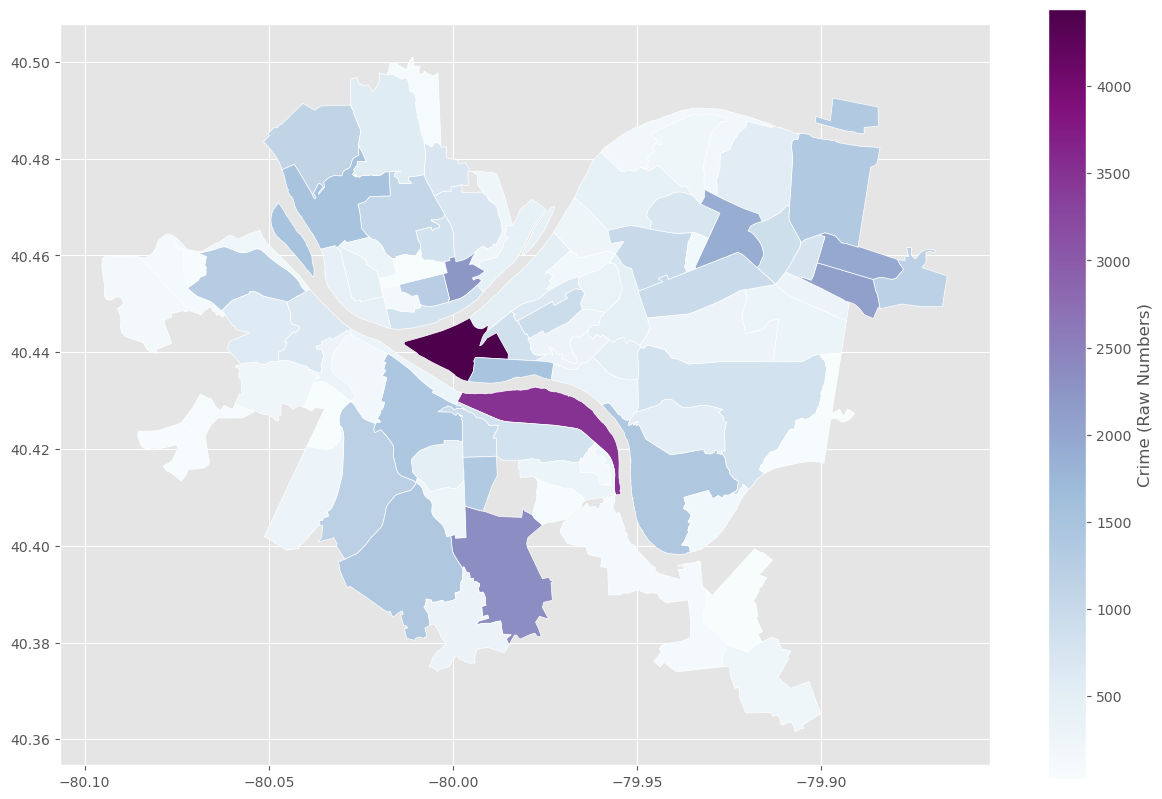

In [49]:
merged.plot(column='count', # set the data to be used for coloring
               cmap='BuPu',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Crime (Raw Numbers)"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()

In [61]:
population = pd.read_csv("total-population.csv")[["Neighborhood", "Estimate; Total"]]
merged_2 = merged.merge(population, left_on="hood", right_on="Neighborhood")
print(merged_2)

    objectid  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0          1         0.0        42        003    040500          1   
1          2         1.0        42        003    040400          1   
2          3         2.0        42        003    040200          2   
3          4         3.0        42        003    030500          2   
4          5         5.0        42        003    020300          1   
..       ...         ...       ...        ...       ...        ...   
84        88       298.0        42        003    563100          3   
85        89        32.0        42        003    562600          1   
86        90        57.0        42        003    250700          1   
87        91        96.0        42        003    562300          2   
88      1292         NaN      None       None      None       None   

         geoid10     namelsad10 mtfcc10 funcstat10  ...  created_us  \
0   420030405001  Block Group 1   G5030          S  ...   pgh.admin   
1   420030404001 

In [70]:
merged_2["crime_per"] = merged_2["count"]/merged_2["Estimate; Total"] * 100
merged_2["crime_per"]

0       8.948815
1       4.738596
2      18.928363
3      37.707865
4      67.336011
         ...    
84     11.783439
85    123.404255
86     39.227895
87     23.603352
88     15.566163
Name: crime_per, Length: 89, dtype: float64

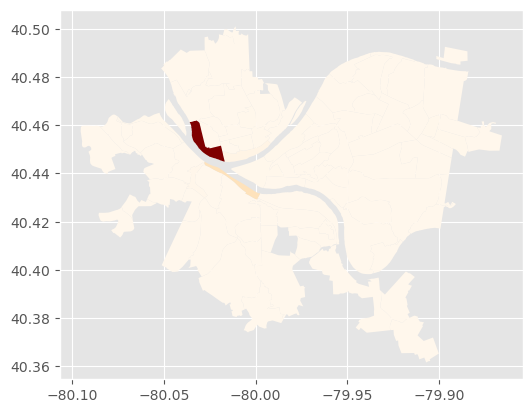

In [71]:
merged_2.plot(column="crime_per", cmap="OrRd")
plt.show()